# Linear Discriminant Analysis (LDA)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

# Transpose of numpy array
iris_tp = iris.data.transpose()

# Creating dataframe from transposed array
df = pd.DataFrame({"sepal_length":iris_tp[0],
                   "sepal_width":iris_tp[1],
                   "petal_length":iris_tp[2],
                   "petal_width":iris_tp[3]})
#
# Adding target or class
df["class"] = iris.target

print(df.head())
print(df.tail())
print(df.describe())
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0
     sepal_length  sepal_width  petal_length  petal_width  class
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2
       sepal_length  sepal_width  petal_length  petal_width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828

In [2]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal_length',
                  'sepal_width',
                  'petal_length',
                  'petal_width', ))}
feature_dict

{0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}

In [4]:
X = iris.data
y = iris.target + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

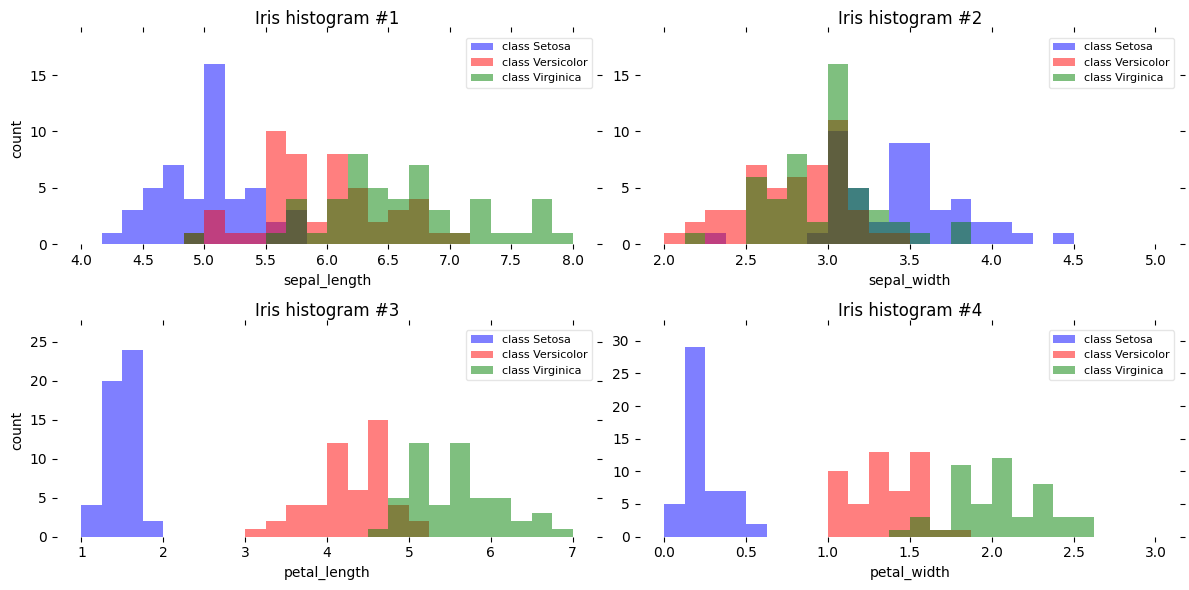

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()


# Implement LDA Step-by-step

## Step-1: Compute d-simensional mean vectors

In [15]:
np.set_printoptions(precision=4)

In [10]:
mean_vectors = []

for cl in range(1,4):
  mean_vectors.append(np.mean(X[y==cl], axis=0))
  #print('Mean Vecor for class %s %s\n', %(cl, mean_vector[cl-1]))
  print('Mean Vector for class',cl,'is', mean_vectors[cl-1])


Mean Vector for class 1 is [5.006 3.428 1.462 0.246]
Mean Vector for class 2 is [5.936 2.77  4.26  1.326]
Mean Vector for class 3 is [6.588 2.974 5.552 2.026]


## Step-2: Compute the scatter matrices (within-class and between class scatter matrices)

In [12]:
# Within-class scatter matrix

S_W = np.zeros((4,4))

for cl, mv in zip(range(1,4), mean_vectors):
  class_sc_mat = np.zeros((4,4))
  for row in X[y==cl]:
    row, mv = row.reshape(4,1), mv.reshape(4,1)
    class_sc_mat += (row-mv).dot((row-mv).T)
  S_W += class_sc_mat 

print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [16]:
# Between-class scatter matrix

overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))

for i, mean_vec in enumerate(mean_vectors):
  n = X[y==i+1].shape[0]
  mean_vec = mean_vec.reshape(4,1)
  overall_mean = overall_mean.reshape(4,1)
  S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)


between-class Scatter Matrix:
 [[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


## Step-3: Solving the generalized eigenvalue probelm for the (S_W)-1 * S_B

In [17]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [18]:
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)  
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.2087]
 [-0.3862]
 [ 0.554 ]
 [ 0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[-0.1416]
 [-0.2125]
 [-0.2703]
 [ 0.6927]]
Eigenvalue 3: -2.89e-15

Eigenvector 4: 
[[-0.1416]
 [-0.2125]
 [-0.2703]
 [ 0.6927]]
Eigenvalue 4: -2.89e-15


## Step-4: Selecting linear discriminant for the new feature subspace

### 4.1 Sort the eigenvectors by decreasing eigenvalues

In [20]:
# Make a list of (eigenvalue, eigenvector) tuple
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuple from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually conform it
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])


Eigenvalues in decreasing order:

32.191929198278025
0.28539104262306647
3.7355530009793716e-15
3.7355530009793716e-15


In [21]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.12%
eigenvalue 2: 0.88%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


### 4.2 Choosing k eigenvectors with the largest eigenvalues

In [22]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2087 -0.0065]
 [-0.3862 -0.5866]
 [ 0.554   0.2526]
 [ 0.7074 -0.7695]]


## Step-5: Transform the samples into lower-dimensional feature space (Dimension Reduction of the original feature vectors)

In [24]:
X.shape

(150, 4)

In [23]:
X_lda = X.dot(W)
X_lda.shape

(150, 2)

## A helper function to plot the Linear Discriminants

In [25]:
from matplotlib import pyplot as plt

def plot_lda(data, title):

    X_lda = data
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD-1')
    plt.ylabel('LD-2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.6)
    plt.title(title)

    # # hide axis ticks
    # plt.tick_params(axis="both", which="both", bottom="off", top="off",  
    #         labelbottom="on", left="off", right="off", labelleft="on")

    # # remove axis spines
    # ax.spines["top"].set_visible(False)  
    # ax.spines["right"].set_visible(False)
    # ax.spines["bottom"].set_visible(False)
    # ax.spines["left"].set_visible(False)    

    plt.grid()
    #plt.tight_layout
    plt.show()


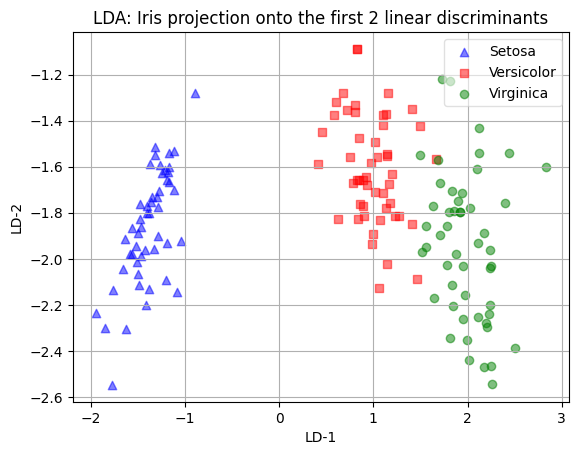

In [26]:
plot_lda(X_lda,'LDA: Iris projection onto the first 2 linear discriminants' )

# LDA using Scikit-learn

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [38]:
sklearn_lda.explained_variance_ratio_

array([0.9912, 0.0088])

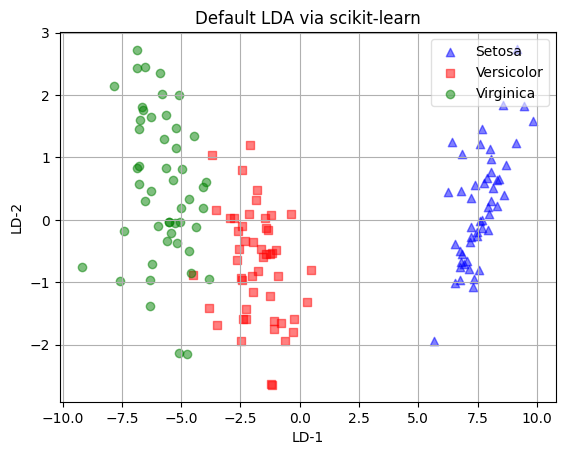

In [37]:
plot_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

# Perform Classification in Lower Dimension

In [39]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression().fit(X_lda_sklearn, y)

Text(0.5, 1.0, 'Decision surface for Logistic Regression on LDA projected data')

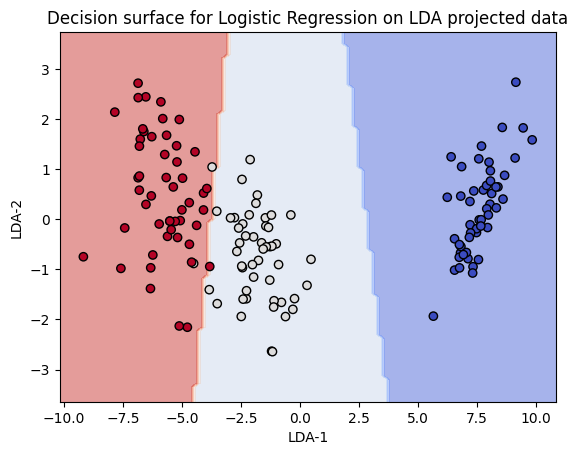

In [40]:
from sklearn.inspection import DecisionBoundaryDisplay

# Plotting the decision boundaries of the classifier
disp = DecisionBoundaryDisplay.from_estimator(lr_classifier, 
                                              X_lda_sklearn, 
                                              response_method="predict",
                                              xlabel='LDA-1', ylabel='LDA-2',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

# Plotting the scattered data points    
disp.ax_.scatter(X_lda_sklearn[:, 0], X_lda_sklearn[:, 1], 
                 c=y, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.title("Decision surface for Logistic Regression on LDA projected data")
